##### Martes 1 de abril de 2024
###### Gomez Trejo Ezequiel

# Regresión Lineal Múltiple. House Prices

#### Paso 1. Importar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Paso 2. Importación y exploración de datos

In [3]:
train = pd.read_csv('train.csv')

In [4]:
#Exploración
print("\nHOUSE PRICE\n")
print("Primeras 5 líneas del Dataset: \n")
print(train.head())


HOUSE PRICE

Primeras 5 líneas del Dataset: 

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  S

In [5]:
print("\nEstadísticas descriptivas: \n")
print(train.describe())


Estadísticas descriptivas: 

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407

In [6]:
print("\nInformación del Dataset:\n")
print(train.select_dtypes(['number']).dtypes)


Información del Dataset:

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [7]:
print("\nColumnas del Dataset: \n")
print(train.columns)


Columnas del Dataset: 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       

In [8]:
print("\nMatriz de Correlación: \n")
print(train.corr(numeric_only=True))


Matriz de Correlación: 

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   

#### Paso 3. División de Datos

In [9]:
x = train[['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']]
y = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,
    random_state=42
)

In [11]:
print(f"Los datos de x entrenamiento son: {x_train.shape[0]}")
print(f"Los datos de x test son: {x_test.shape[0]}")

Los datos de x entrenamiento son: 1168
Los datos de x test son: 292


#### Paso 4. Entrenar el modelo

In [12]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

#### Paso 5. Evaluar el modelo

In [13]:
y_pred = modelo.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\n---Métricas de evaluación del modelo--- \n")
print(f"R2(Coeficiente de determinación): {r2:.4f} \n")
print(f"RMSE(Raíz del error cuadrático medio): {rmse:.4f} \n")


---Métricas de evaluación del modelo--- 

R2(Coeficiente de determinación): 0.7910 

RMSE(Raíz del error cuadrático medio): 40036.4187 



#### Paso 6. Gráfico Predicciones VS Valores reales

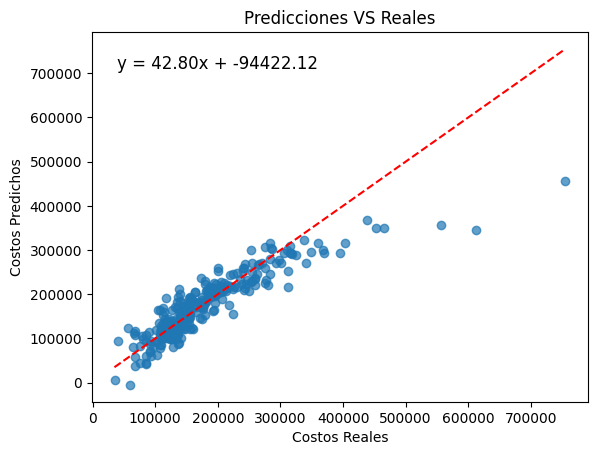

In [19]:
plt.title('Predicciones VS Reales')
plt.xlabel('Costos Reales')
plt.ylabel('Costos Predichos')
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
# Ecuación de regresión 
ecuacion = f'y = {modelo.coef_[0]:.2f}x + {modelo.intercept_:.2f}'
plt.text(0.05, 0.9, ecuacion, transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()

#### Paso 7. Predicción

In [22]:
#Datos de un nuevo proyecto

print("\nHOUSE PRICE")
nuevo_proyecto = pd.DataFrame({
    'GrLivArea': [118],
    'OverallQual': [7],
    'GarageCars': [2],
    'TotalBsmtSF': [1400]
})

#Predecir 
costo_predicho = modelo.predict(nuevo_proyecto)
print("\nDatos del nuevo proyecto: \n")
print(f"GrLivArea: {nuevo_proyecto['GrLivArea'].values[0]}")
print(f"OverallQual: {nuevo_proyecto['OverallQual'].values[0]}")
print(f"GarageCars: {nuevo_proyecto['GarageCars'].values[0]}")
print(f"TotalBsmtSF: {nuevo_proyecto['TotalBsmtSF'].values[0]}")
print(f"\nEl costo predicho para la nueva casa es de: ${costo_predicho[0]:.2f}")


HOUSE PRICE

Datos del nuevo proyecto: 

GrLivArea: 118
OverallQual: 7
GarageCars: 2
TotalBsmtSF: 1400

El costo predicho para la nueva casa es de: $155878.77
